In [1586]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker


ldir = os.chdir(r'C:\Users\ASUS\Desktop\Beadandó elemző feladat')

df = pd.read_csv('sales_data_sample.csv', sep=",", encoding='Latin-1')

column_names = list(df.columns.values)

#print("Oszlopok:","\n",column_names,"\n")
#df.head(5)


VIZSGÁLJUK MEG A TÁBLÁNK STRUKTÚRÁJÁT ÉS TISZTÍTSUK MEG AZ ADATOKAT!

In [1587]:
dict = {"ORDERNUMBER" : "Order number","QUANTITYORDER" : "Quantity of products on the orderline","PRICEEACH" : "Price for 1 product on the order line","ORDERLLINENUMBER" : "Orderline number of order number","SALES" : "Sale amount of order line","ORDERDATE" : "Date of order","STATUS" : "Status of order","QTR_ID" : "Quarter of order (1: Quarter 1, 2: Quarter 2,etc.)","MONTH_ID" : "Month of order (1: January, 2: February, 3: March, etc.)","YEAR_ID" : "Year of order","PRODUCTLINE" : "Product category","MSRP" : "Manufacturer's suggested retail price","PRODUCTCODE" : "Product number","CUSTOMERNAME" : "Customer name","PHONE" : "Customer's phone name","ADDRESSLINE1" : "Address information of customer 1","ADDRESSLINE2" : "Address information of customer 2","CITY" : "City of address","STATE" : "State of address","POSTALCODE" : "Postalcode of address","COUNTRY" : "Country of address","TERRITORY" : "Region of address","CONTACTLASTNAME" : "Contac person's last name for customer","CONTACTFIRSTNAME" : "Contac person's first name for customer","DEALSIZE" : "Size of the sale for order line"}

#print("A DataFrame",df.shape[0],"Sort és",df.shape[1],"Oszlopot tartalmaz!")

df_columns_explantion = pd.DataFrame(dict,index=[0])
df_columns_explantion = df_columns_explantion.transpose()
#df_columns_explantion

In [1588]:
#df.info()

In [1589]:
#print(df.isnull().sum())
#print("Látható, hogy pár oszlopban rengeteg adat hiányzik ezek célszerű lehet a későbbiekben törölni")

In [1590]:
print(df.duplicated().sum())
print("Nincs duplikáció ami jó hír ezzel a későbbiekben nem kell foglalkozunk")

0
Nincs duplikáció ami jó hír ezzel a későbbiekben nem kell foglalkozunk


In [1591]:
#Töröljük ki azokat az oszlopokat ahol sok adat hiányzik
df.drop(['ADDRESSLINE2', 'STATE', 'POSTALCODE', 'TERRITORY'], axis=1, inplace=True)
#Töröljük ki azokat az oszlopokat amelyekre nem lesz szükségünk
df.drop(['ORDERNUMBER','ORDERLINENUMBER','ORDERDATE','STATUS','QTR_ID','PHONE','CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'PRODUCTCODE', 'ADDRESSLINE1'], axis=1, inplace=True)
#df

MOST, HOGY MEGTISZTÍTOTTUK A TÁBLÁNKAT ELKEZDHETJÜK ELEMEZNI AZ ADATOKAT

Kik a top ügyfelek?

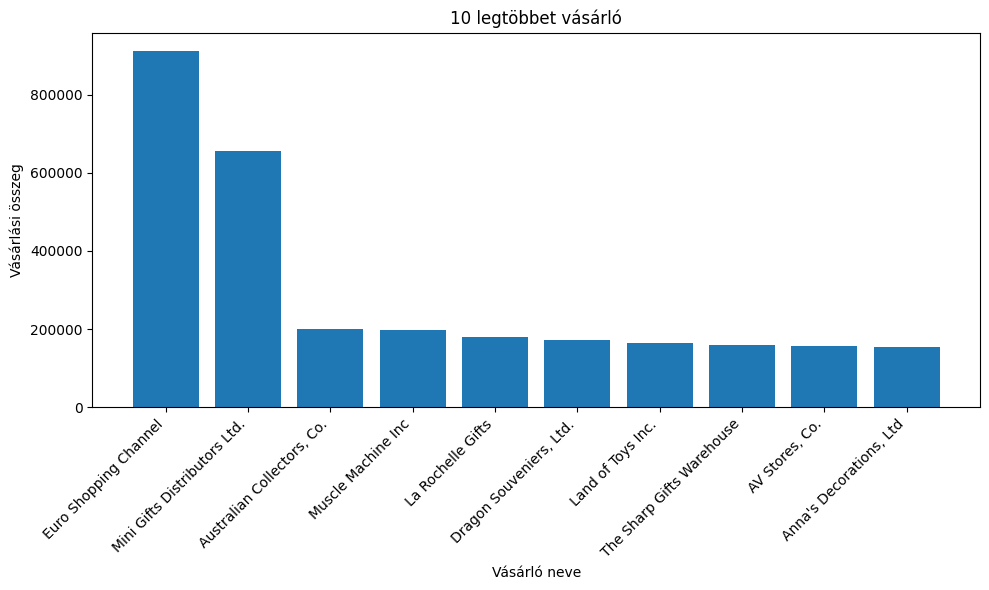

In [1592]:
#Nézzük meg a 10 legnagyobb ügyfelünket

sales_by_customers = df['SALES'].groupby(df['CUSTOMERNAME']).sum()
top10_customers = sales_by_customers.nlargest(10)

def drawTop10CostumerDiagram():
    plt.figure(figsize=(10,6))
    plt.bar(top10_customers.index, top10_customers.values)
    plt.xlabel('Vásárló neve')
    plt.ylabel('Vásárlási összeg')
    plt.title('10 legtöbbet vásárló')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

drawTop10CostumerDiagram()

Melyik évben mennyi bevételünk volt?

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14288\4058451552.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p = sns.barplot(data=sales_by_year, palette='viridis')


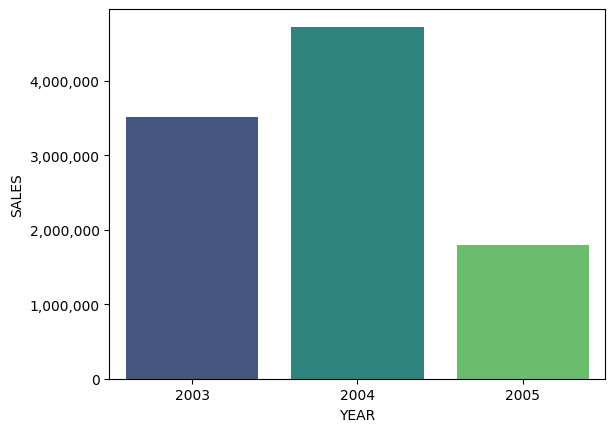

In [1593]:
#Elöször hozzunk létre egy Date oszlopot a YEAR_ID ilettve a MONTH_ID segítségével
df['DATE'] = pd.to_datetime(df['YEAR_ID'].astype(str) + '-' + df['MONTH_ID'].astype(str), format='%Y-%m')

#Ezekre már nem lesz szükség
df.drop(columns=["MONTH_ID","YEAR_ID"],inplace=True)

#Majd az átláthatóság kedvért a Dátum oszlopot az első helyre hozzuk
cols = list(df.columns)
cols.insert(0, cols.pop(cols.index('DATE')))
df = df[cols]


# Éves bevétel számítása
sales_by_year = df['SALES'].groupby(df['DATE'].dt.year).sum()

def drawSalesByYearDiagram():
    p = sns.barplot(data=sales_by_year, palette='viridis')
    formatter = ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x))
    p.yaxis.set_major_formatter(formatter)
    p.set_ylabel("SALES")
    p.set_xlabel("YEAR")

drawSalesByYearDiagram()

Melyik országba mennyi terméket adtunk el és ezeknek milyen az eloszlása?

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14288\8428876.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=sales_by_countries, palette='viridis')


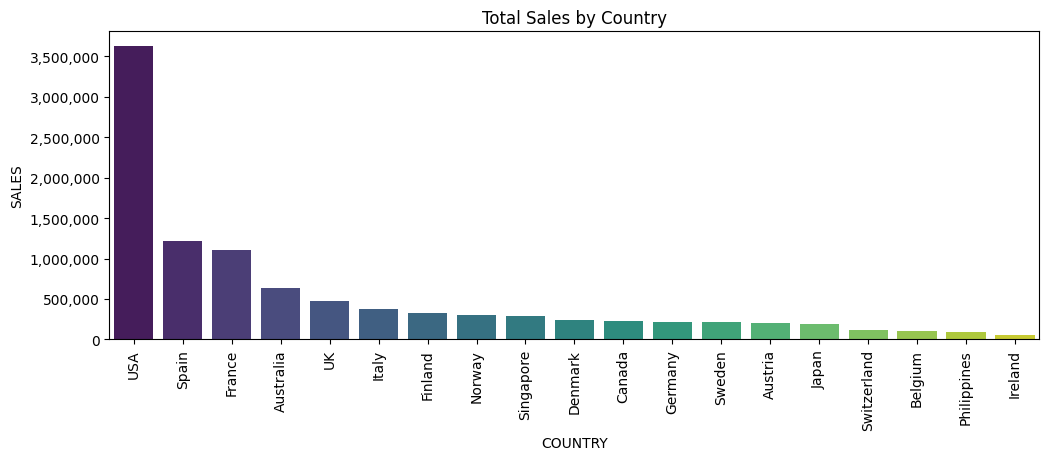

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14288\8428876.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=sales_percentage_df, x='Percentage', y='COUNTRY', palette='viridis', orient='h')


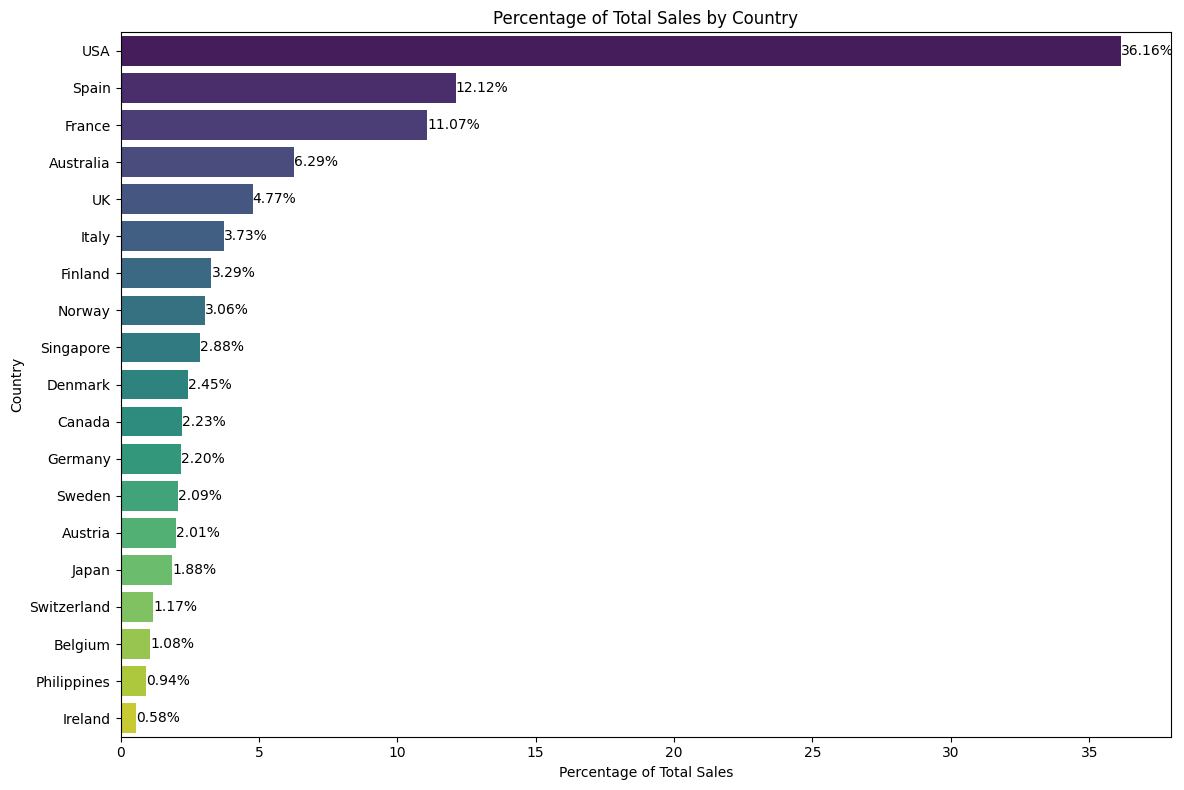

In [1594]:
sales_by_countries = df['SALES'].groupby(df['COUNTRY']).sum()
sales_by_countries = sales_by_countries.sort_values(ascending=False)


# 1. Diagram
plt.figure(figsize=(12, 4))
ax = sns.barplot(data=sales_by_countries, palette='viridis')
formatter = ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x))
ax.yaxis.set_major_formatter(formatter)
plt.xticks(rotation=90)
plt.title('Total Sales by Country')
plt.show()

# 2. Diagram
total_sales = sales_by_countries.sum()
sales_percentage_by_country = (sales_by_countries / total_sales) * 100
sales_percentage_df = sales_percentage_by_country.reset_index(name='Percentage')

plt.figure(figsize=(12, 8))
ax = sns.barplot(data=sales_percentage_df, x='Percentage', y='COUNTRY', palette='viridis', orient='h')
plt.xlabel('Percentage of Total Sales')
plt.ylabel('Country')
plt.title('Percentage of Total Sales by Country')

for i, (percentage, country) in enumerate(zip(sales_percentage_df['Percentage'], sales_percentage_df['COUNTRY'])):
    ax.text(percentage, i, f'{percentage:.2f}%', ha='left', va='center', color='black')

plt.tight_layout()
plt.show()

Vizsgájuk meg az egyes termék kategóriák jellemzőit!

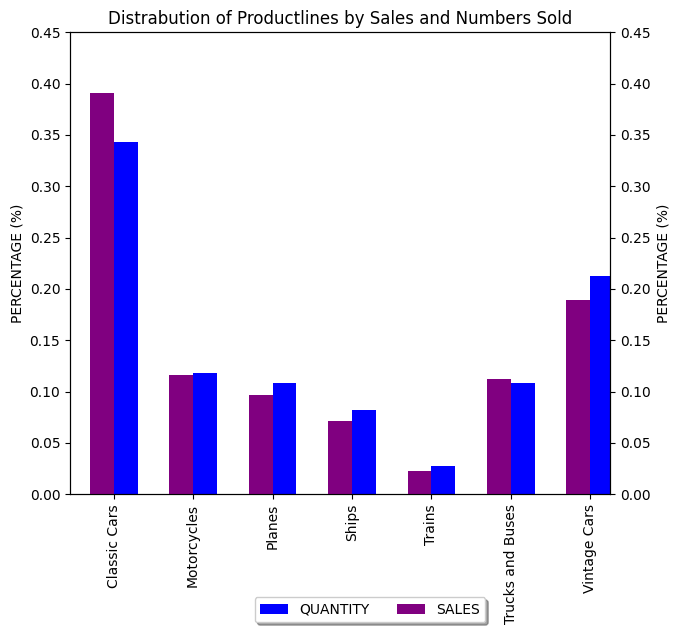

In [1595]:
products = df['PRODUCTLINE'].unique()

total_quantity = df['QUANTITYORDERED'].sum()
total_sales = df['SALES'].sum()

products_by_quantity = df.groupby('PRODUCTLINE')['QUANTITYORDERED'].sum()
products_by_sales = df.groupby('PRODUCTLINE')['SALES'].sum()

products_by_quantity_distribution = (products_by_quantity / total_quantity)
products_by_sales_distribution = (products_by_sales / total_sales)

product_quantity_df = pd.DataFrame(products_by_quantity_distribution)
product_sales_df = pd.DataFrame(products_by_sales_distribution)

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
width = 0.3
product_quantity_df['QUANTITYORDERED'].plot(kind='bar', color='blue', ax=ax1, width=width, position=0, label='QUANTITY')
product_sales_df['SALES'].plot(kind='bar', color='purple', ax=ax2, width=width, position=1, label='SALES')
plt.xlabel('PRODUCT')
ax1.set_ylabel('PERCENTAGE (%)')
ax2.set_ylabel('PERCENTAGE (%)')
ax1.set_xlabel('')
ax1.set_ylim(0,0.45)
ax2.set_ylim(0,0.45)
fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)
fig.subplots_adjust(right=0.8)
plt.title('Distrabution of Productlines by Sales and Numbers Sold')
plt.show()

Vizsgájuk meg az idő és az eladások kapcsolatát!

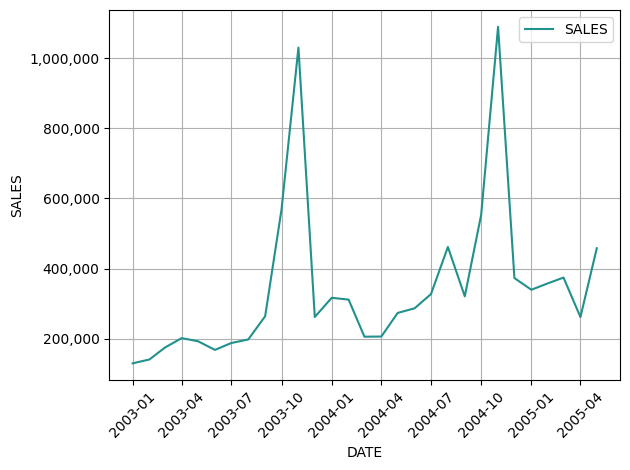

A diagramon megfigyelhető, hogy karácsony környékén drasztikusan megnőttek az eladások 
 Valamint az is látszik, hogy az eladások növekvő trendet követnek
A két legnagyobb bevételű hónap: 
                  SALES
DATE                  
2004-11-01  1089048.01
2003-11-01  1029837.66


In [1596]:
ts_df = df.copy()
ts_df = ts_df[["DATE", "SALES"]]

ts = ts_df.groupby("DATE").sum()

def drawTimeSeriesDiagram():
    ax = sns.lineplot(data=ts,palette='viridis')
    formatter = ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x))
    ax.yaxis.set_major_formatter(formatter)
    plt.ylabel("SALES")
    plt.xlabel("DATE")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid()
    plt.show()

drawTimeSeriesDiagram()

print("A diagramon megfigyelhető, hogy karácsony környékén drasztikusan megnőttek az eladások","\n","Valamint az is látszik, hogy az eladások növekvő trendet követnek")
print("A két legnagyobb bevételű hónap:","\n", ts.nlargest(2, columns=["SALES"]))


Lineáris regresszió egyenlete:
y = 9935.77 * x + 206851.97

Előrejelzés:
2005-06: 494989.23
2005-07: 504925.00
2005-08: 514860.77
2005-09: 524796.53
2005-10: 534732.30


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14288\1193774634.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start=ts.index[-1], periods=interval, freq='M')


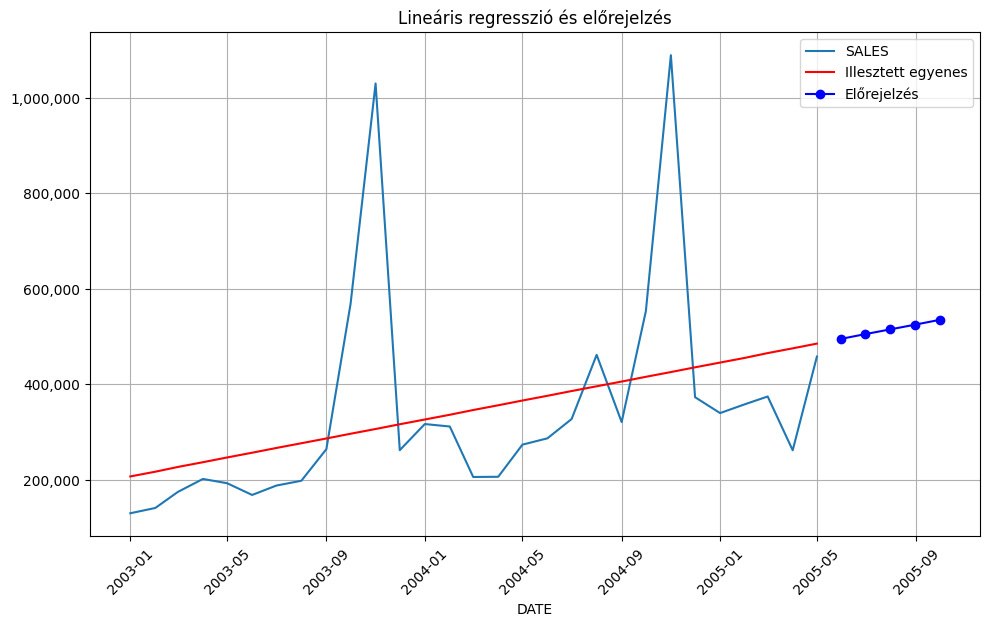

In [1597]:
from sklearn.linear_model import LinearRegression

def drawLinearRegressionForecast(ts, interval: int):
    
    # Lineáris regresszió illesztése
    X = np.arange(len(ts)).reshape(-1, 1)
    y = ts.values.reshape(-1, 1)

    model = LinearRegression().fit(X, y)

    # Lineáris regresszió egyenes paraméterei
    slope = model.coef_[0][0]
    intercept = model.intercept_[0]

    print("Lineáris regresszió egyenlete:")
    print(f"y = {slope:.2f} * x + {intercept:.2f}")

    # Előrejelzés az utolsó időpont utánra
    start_index = len(ts)
    end_index = start_index + interval
    forecast_X = np.arange(start_index, end_index).reshape(-1, 1)
    forecast = model.predict(forecast_X)

    print("\nElőrejelzés:")
    current_year = ts.index[-1].year
    current_month = ts.index[-1].month
    for i, prediction in enumerate(forecast):
        predicted_month = current_month + i + 1
        predicted_year = current_year
        if predicted_month > 12:
            predicted_month -= 12
            predicted_year += 1
        print(f"{predicted_year}-{predicted_month:02d}: {prediction[0]:.2f}")

    forecast_dates = pd.date_range(start=ts.index[-1], periods=interval, freq='M')
    
    plt.figure(figsize=(10,6))
    
    # Eredeti adatok ábrázolása
    ax = sns.lineplot(data=ts)
    formatter = ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x))
    ax.yaxis.set_major_formatter(formatter)

    # Illesztett egyenes ábrázolása
    plt.plot(ts.index, model.predict(X), color='red', label='Illesztett egyenes')
    # Előrejelzett értékek ábrázolása
    plt.plot(forecast_dates, forecast, 'bo-', label='Előrejelzés')
    plt.title('Lineáris regresszió és előrejelzés')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.show()

drawLinearRegressionForecast(ts, 5)